# Assignment 2: Getting data from Twitter API

For working on this assignment, the easiest way is to log into the [datahub.berkeley.edu](http://datahub.berkeley.edu). If you have a @berkeley.edu email address, you already have full access to the programming environment hosted on that site. 

## 1. Intro

Twitter collects a *lot* of data. Ranging from tweets themselves, to data about users, to data about likes and other interactions, Twitter basically records everything that happens on their website. Lucky for data scientists like ourselves, Twitter also shares that data with us! In this assignment, we're going to use Twitter's API to analyze retweet statistics, demographics, and some other data too! 

## 2. Importing Libraries

Other people are also interested in analyzing Twitter data, so there's been work done here already. That means other folks have developed useful collections of code — called libraries — which handle a lot of parsing and data management, so that we don't have to. Since these libraries are published online, we have access to all that hard work too! That means we can use code from those libraries to handle all the complicated Twitter models, so we only have to worry about the actual analysis (which is the fun part).

You don't need to worry too much about the code in the next cell. Its purpose is to install libraries that other people have written, so that we have access to them later on.

In [28]:
!pip install tweepy    # This halps us access Twitter data.
!pip install textblob  # This helps us parse text.
!pip install plotly    # This makes it easy to plot graphs.
!pip install nltk      # This is also to parse text.

## 3. Accessing the Data

### Question 1
Follow these instructions to get your keys:
To work on Twitter data, we'll first need two things: a Twitter account, and Twitter keys. Here are the steps to follow:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
1. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.
1. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
1. On the page for that application, find your Consumer Key and Consumer Secret. Don't lose these!
1. On the same page, create an Access Token. Record the resulting Access Token and Access Token Secret. Don't lose these either!

**Security concern:** DO NOT share your access keys with anyone. They can be used to manage your Twitter account without your permission.

Add your credentials in the cell below. Your program will use them to access Twitter data.

In [29]:
consumer_key = "IjI8AdEUOlzif3J0qgt6bw9JI"
consumer_secret = "gZLhygPv5uBCWIQVr6sZjCgYVfcXGzGuTNl7oOapYmWazdLEm6"
access_key = "278661116-qdUru3GXVYT9upGH0cgbwROu4KzypMSwQgknMNW2"
access_secret = "RMZY9H7vvbuHq9jFZO4fdtw5cBPZUlbLDhEwU9zir6LyG"

The next cell will authorize your program to request Twitter data, through the developer account you just set up.

In [30]:
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

**Note**: A lot of data scientists like Twitter data. As a result, you can only request data approximately once every 15 minutes to keep Twitter's servers from crashing due to too much activity. Use your requests wisely to avoid unnecessary waiting time.

### Question 2:
[Twitter API](https://dev.twitter.com/overview/api) can be used for retrieving different objects (e.g., tweets). List the other possible objects that can be retrieved by Twitter API.


**Answer:**
1. Users
1. Entities
1. Places

Now that everything is set up, we can use [Twitter's search API](https://dev.twitter.com/rest/reference/get/search/tweets) to find the word "Berkeley". This will give us the same results as using [Twitter's online "search" page](https://twitter.com/search?q=berkeley).

In [4]:
results = tweepy.Cursor(api.search,   # `api.search` specifies we want to perform a search.
                        q='Berkeley', # `q` is the query, or the words we're searching for.
                        result_type='popular') # We'll prioritize more popular results first.

Now `results` is a long list of search results. Since it is actually pretty extensive, let's just take the first ten results. In the next cell we build up a list called `first_ten`, which contains just the first ten tweets we found in `results`.

In [5]:
first_ten = []                  # We start out with an empty list called `first_ten`.
for tweet in results.items(10): # Then, we'll iterate over the first 10 tweets in `results`...
    first_ten.append(tweet)     # And we'll add each of those tweets to `first_ten`.

Now lets have a peek at what the data looks like. 

In [ ]:
print(first_ten)

## 4. Exploring the Dataset

Twitter gives us a lot of information about each tweet, not just its text. You can read about all the details [here](https://dev.twitter.com/overview/api/tweets). Let's look at one tweet to get a sense of the information we have available. We can access just the first tweet in our list by indexing into it. Note, the first index in the list is actually 0, not 1, so we will actually say `first_ten[0]` to see the first tweet in our list of ten tweets.

In [ ]:
print(first_ten[9]) # Try changing this to any number 0-9, to see other tweets in the list.

In [8]:
print(first_ten[0].text) # Try this and inspect what it does

Fraternal Order of Police successfully lobbied Trump to cancel funding for exhibit at Cal on Black Panthers: https://t.co/8pRq5VnAvn


In [9]:
print(first_ten[0].created_at) # Try this and inspect what it does 

2017-10-29 13:33:52


### Question 3:
Which field contains each of the following attributes:
1. The tweet's text?
1. The time when the tweet was posted?
1. The geographic location of the tweet?
1. The source (device and app) where the tweet was written?

**Answer:**
1. text
1. created_at
1. coordinates
1. source

## 5. Analyzing the Dataset

It's time to do analysis! Let's start out by getting a list, where each entry corresponds to how many retweets we got in the first 

In [21]:
retweet_counts = []                      # We start with an empty list called `retweet_counts`.
for tweet in first_ten:                  # Then, we iterate over the tweets in `first_ten`...
    retweet_count = tweet.retweet_count  # And, for each tweet, get the number of retweets...
    retweet_counts.append(retweet_count) # And append that number to our list `retweet_counts`.
    
print(retweet_counts)

[1149, 187, 76, 136, 49, 117, 258, 49, 23, 16]


Let's try and draw it:

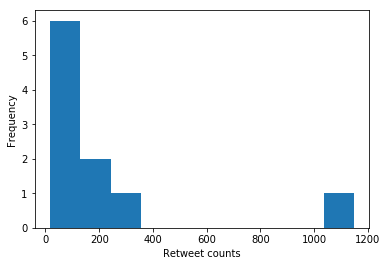

In [20]:
import matplotlib.pyplot as plt
plt.hist(retweet_counts)
plt.xlabel("Retweet counts")
plt.ylabel("Frequency")
plt.show()

### Question 4
Twitter search api provides three modes (check out this [guide](https://dev.twitter.com/rest/reference/get/search/tweets)) for the result_type: mix, recent, and popular. In the previous code, we retrieved the popular tweets. 
Now it is your turn to retrieve recent 100 tweets and assign them to a new variable (e.g., results_recent100), then plot a histogram for the retweet count of the recent 100 tweets. You can follow our example code if you wish. 


**Answer**


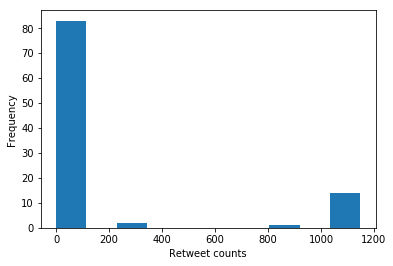

In [12]:
results_recent100 = tweepy.Cursor(api.search, q='Berkeley', result_type='recent')
first_recent100 = []
for tweet in results_recent100.items(100):
    first_recent100.append(tweet)
retweet_counts_recent100 = []
for tweet in first_recent100:
    retweet_count_recent100 = tweet.retweet_count
    retweet_counts_recent100.append(retweet_count_recent100)

import matplotlib.pyplot as plt
plt.hist(retweet_counts_recent100)
plt.xlabel("Retweet counts")
plt.ylabel("Frequency")
plt.show()

### Question 5
Compare and contrast between the two histograms for retweet counts of recent and popular 100 tweets that returns from searching the word Berkeley. 

**Answer**: The answer for this questions has two parts:
1. Plot of the retweet counts of the most 100 popular tweets
2. Text comparison between the plot the most 100 popular and the plot of the most 100 recent tweets that was plotted in the previous question


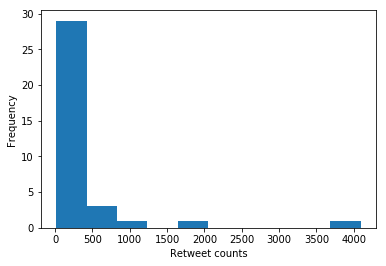

In [13]:

results_popular100 = tweepy.Cursor(api.search, q='Berkeley', result_type='popular')
first_popular100 = []
for tweet in results_popular100.items(100):
    first_popular100.append(tweet)
retweet_counts_popular100 = []
for tweet in first_popular100:
    retweet_count_popular100 = tweet.retweet_count
    retweet_counts_popular100.append(retweet_count_popular100)

import matplotlib.pyplot as plt
plt.hist(retweet_counts_popular100)
plt.xlabel("Retweet counts")
plt.ylabel("Frequency")
plt.show()

From the above graphs, we notice that the most popular tweets has more retweets than the recent tweets. Some tweets in the most popular 100 tweets has 4000 retweets, while the maximum retweets of the most 100 recent tweets is 1200. 

## Users
Instead of searching for tweets, you can use Twitter APIs to get details about specific user account. It includes user’s timeline, followers, etc.

Get the latest 10 tweets from an account that interests you (e.g.,  UCBerkeley) twitter account using the following code.

In [ ]:
user_results = api.user_timeline(screen_name='UCBerkeley', count=10)
print(user_results)
user_results_tweets = []           # We start with an empty list called user_results_tweets

for t in user_results:             #Then, we iterate over the tweets in user_results
    user_results_tweets.append(t)#And we'll add each of those tweets to user_results_tweets 
    print(t)

In [ ]:
#Let's look at one tweet
print(user_results_tweets[0])


In [16]:
#print the text of the first 10 tweets
for tweet in user_results_tweets:
    print(tweet.created_at.strftime("%Y-%b-%d %H:%M"))
    print(tweet.text)
    print()

2017-Oct-30 20:03
World #science journalists explore Berkeley’s best, incl. jumping #robots 🤖:  https://t.co/LHTJxNn4q2  @WCSJ2017… https://t.co/WVxw2r7xcj

2017-Oct-30 18:55
RT @CalAdmissions: Join us for a Facebook Live Q&amp;A panel at 6pm PST, featuring freshman &amp; transfer applicant experts. https://t.co/AsZFqJ1A…

2017-Oct-30 18:45
“I wanted to obliterate whatever preconceptions people have abt people w/ #disabilities.” Hale Zukas story:… https://t.co/QWPj1mH1lv

2017-Oct-30 17:49
RT @UofCalifornia: UC remains committed to ensuring that fall 2018 applicants affected by the recent natural disasters receive support. htt…

2017-Oct-30 16:17
Last chance to support Berkeley student #crowdfunding projects. Help go from idea to impact:… https://t.co/cL0O01zT4y

2017-Oct-30 15:25
RT @BerkeleyLab: Get your #darkmatter questions answered today by dark matter hunter Dan McKinsey. LIVE @reddit_AMA, 2p ET/11a PT https://t…

2017-Oct-30 15:03
ICYMI: $65.5 million from @NIH to create #brain 

### Question 6

Look at the text of retrieved tweets and compare them to the latest 10 tweets of the [web interface](https://twitter.com/UCBerkeley) for the same user. Do you see any difference? 

**Answer**: The text of tweets on the web interface is the same as the text retrieved by the API. However, there are few differences you notice in the whole tweets. For example, you find the pinned tweet appears on the top of the Web interface. Furthermore, the links in the tweets are shortened in the retrieved text by the API, for example, the second tweet above contains a shortened link for this link: https://www.facebook.com/UCBerkeleyAdmissions, which is not shortened in the [tweet](https://twitter.com/CalAdmissions/status/925037086201262083) on the Web interface. 

Here is the text of the tweet as retrieved by the API:
"RT @CalAdmissions: Join us for a Facebook Live Q&amp;A panel at 6pm PST, featuring freshman &amp; transfer applicant experts. https://t.co/AsZFqJ1A…"

Here is the text of the same tweet of the Web interface:
"Join us for a Facebook Live Q&A panel at 6pm PST, featuring freshman & transfer applicant experts. http://www.facebook.com/UCBerkeleyAdmissions … #BeBerkeley"




Get a list of a followers for UCBerkeley.

In [ ]:
followers_list = []
followers_results = api.followers(screen_name='UCBerkeley', count=200)
for f in followers_results:
    followers_list.append(f)
#print 10 followers of @UCBerkeley
for f in followers_list(10):
    print(f.name)

There’s a limit on how many users can be returned by one request. If you need more, please read [using cursors to navigate collections](https://dev.twitter.com/overview/api/cursoring).

### Extra Credit Question 
We saw how to use Twitter API to search for tweets. The [Search API](https://dev.twitter.com/rest/public/search) has an option to filter the query results by geo location. The parameter value is specified by ”latitude,longitude,radius” (check out the documentation of API  for more information). Compare the top 10 popular tweets text that contain the word 'berkeley' from four geo locations: Berkeley, Kansas City, New York, and Barcelona Spain.


**Answer:** I provided the code that answers the question, but there is an extra step that should be done to answer the question. You should look at the text retrieved of tweets of each city and mention any insight you discovered from investigating the text. You can plot word clouds for the text of each city's tweets or just investigate that manually by reading the entire text. 

In [31]:
pop_tweets_BC = tweepy.Cursor(api.search, q='Berkeley', result_type='popular', geo_code="37.871593,-122.272747")
pop_tweets_KC = tweepy.Cursor(api.search, q='Berkeley', result_type='popular', geo_code="39.099727, -94.578567")
pop_tweets_NY = tweepy.Cursor(api.search, q='Berkeley', result_type='popular', geo_code="40.712784, -74.005941")
pop_tweets_BS = tweepy.Cursor(api.search, q='Berkeley', result_type='popular', geo_code="41.385064, -2.173403")

top10BC = []
top10KC = []
top10NY = []
top10BS = []

for tweet in pop_tweets_BC.items(10):
    top10BC.append(tweet)
for tweet in pop_tweets_KC.items(10):
    top10KC.append(tweet)
for tweet in pop_tweets_NY.items(10):
    top10NY.append(tweet)
for tweet in pop_tweets_BS.items(10):
    top10BS.append(tweet)

#print the text of the first 10 tweets of each city
print("*****The text of the first 10 tweets that come from Berkeley*****")
print()
for tweet in top10BC:
    print(tweet.text)
print()
print()
    
print("*****The text of the first 10 tweets that come from Kansas City*****")
print()
for tweet in top10KC:
    print(tweet.text)
print()
print()

print("*****The text of the first 10 tweets that come from New York*****")  
print()
for tweet in top10NY:
    print(tweet.text)
print()
print()

print("*****The text of the first 10 tweets that come from Barcelona*****")
print()
for tweet in top10BS:
    print(tweet.text)
print()
print()
    

*****The text of the first 10 tweets that come from Berkeley*****

Fraternal Order of Police successfully lobbied Trump to cancel funding for exhibit at Cal on Black Panthers: https://t.co/8pRq5VnAvn
After being lobbied by the Fraternal Order of Police, the @NatlParkService killed a Black Panther exhibit at Cal. https://t.co/fhQ0mSpZq0
Government takes back funding for UC Berkeley Black Panther Project after complaints from police union… https://t.co/EyMswLCQGX
Thank you Berkeley for 3 incredible nights!! https://t.co/vRzs6wZ80n
UC Berkeley Paper Apologizes For Anti-Semitic Cartoon https://t.co/g621W8Bt1I
.@AlanDersh: "They're shouting me down because of who I am. It's all about stereotypes and that has to STOP."… https://t.co/s3VptrDfUg
.@swmrs #UncoolHalloween is going off in Berkeley. https://t.co/JchtE82zBy
Feds pull funding for Black Panther legacy project in Berkeley after backlash https://t.co/XDwIpFszkY https://t.co/rVisPTjOm5
You may have seen Hale Zukas around Berkeley. Did y

### Extra Credit Question
Based on profile_location in the follower data, Compare between the followers of Donald Trump and Hillary Clinton in terms of their locations. We are curious as to whether or not there is a difference locationally between Clinton followers and Trump followers (*note following does not necessarily mean supporting :-)*)  

We can do this by seeing where their respective lists have commonality.  Make a list of similar places!  

Advanced (optional): Make your implementation faster for finding the similar places! Think about changing data structure.

**Answer:**
We provided the code that retrieve the followers locations. You can find how retrieve the geo of followers from the API and plot them into a map or you can take the cities, and map them to their geo then plot a map.

In [23]:
users_trump_followers = api.followers(screen_name="realDonaldTrump", count=100)
names_followers_trump = []
for follower in users_trump_followers:
    if follower.location:
        names_followers_trump.append(follower.location)
        
print("Trump's followers: ")
for f in names_followers_trump:
    print(f)
    
users_clinton_followers = api.followers(screen_name="HillaryClinton", count=100)
names_followers_clinton = []
for follower in users_clinton_followers:
    if follower.location:
        names_followers_clinton.append(follower.location)
        
print()
print()
print("Hillary's followers: ")
for f in names_followers_clinton:
    print(f)
    
similar_cities = []
for follower_c in names_followers_clinton:
    for follower_t in names_followers_trump:
       if follower_c == follower_t:
        similar_cities.append(follower_c)
print(similar_cities)
        
        


Trump's followers: 
England, United Kingdom
West Virginia, USA
Leeds, England
Dublin City, Ireland
Grass Valley, CA
Lincoln, NE
Johannesburg, South Africa
South Africa
Stateside of ‘the Pond’ 
United States
Chattanooga, TN
Denmark
Virginia, USA
Heart of Galaxy Earth
Toronto, Canada
Esteio, Rio Grande do Sul


Hillary's followers: 
Malvern, PA
Haida Gwaii, BC, Canada
Indiana, USA
Gastonia, NC
Baltimore, MD
Hackney, London
Hawdyan-Erbil
Toronto, Canada
San Francisco, CA
Spokane, WA
Lakeland
England
Houston, TX
Jakarta
Key West, FL
['Toronto, Canada']


### Submitting the assignment

- Delete your Twitter API credentials, ie. re-assign `consumer_key`, `consumer_secret`, `access_key`, and `access_secret` to empty strings so that we won't see your credentials when you save and sumbit it.
- Save this jupyter notebook as a pdf. Click File, Download as, PDF via LaTex (.pdf).
- Upload the pdf file into bcourses under Assignment 2.